# Epidemiologická situace obcí

https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/obce.csv



In [43]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv(Path("~/Downloads/obce.csv"))
df

,den,datum,kraj_nuts_kod,kraj_nazev,okres_lau_kod,okres_nazev,orp_kod,orp_nazev,obec_kod,obec_nazev,nove_pripady,aktivni_pripady,nove_pripady_65,nove_pripady_7_dni,nove_pripady_14_dni
0,neděle,2020-03-01,CZ010,Hlavní město Praha,CZ0100,Praha,0,Praha,554782,Praha,2,2,1,2,2
1,neděle,2020-03-01,CZ020,Středočeský kraj,CZ020B,Příbram,2020,Příbram,564214,Počaply,0,0,0,0,0
2,neděle,2020-03-01,CZ020,Středočeský kraj,CZ020B,Příbram,2020,Příbram,564249,Chrást (Příbram),0,0,0,0,0
3,neděle,2020-03-01,CZ020,Středočeský kraj,CZ0204,Kolín,2006,Český Brod,564800,Hradešín,0,0,0,0,0
4,neděle,2020-03-01,CZ020,Středočeský kraj,CZ0204,Kolín,2006,Český Brod,564826,Vrátkov,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428875,úterý,2021-03-23,CZ080,Moravskoslezský kraj,CZ0801,Bruntál,8020,Rýmařov,597791,Ryžoviště,0,7,0,3,5
2428876,úterý,2021-03-23,CZ080,Moravskoslezský kraj,CZ0801,Bruntál,8003,Bruntál,597741,Roudno,0,1,0,1,1
2428877,úterý,2021-03-23,CZ080,Moravskoslezský kraj,CZ0801,Bruntál,8003,Bruntál,597546,Leskovec nad Moravicí,0,9,0,5,9
2428878,úterý,2021-03-23,CZ080,Moravskoslezský kraj,CZ0804,Nový Jičín,8015,Nový Jičín,599905,Starý Jičín,0,27,0,6,20


In [47]:
obce = ["Strážov", "Chudenice", "Čachrov"]

df["datum"] = pd.to_datetime(df.datum)

<AxesSubplot:xlabel='datum', ylabel='nove_pripady_14_dni'>

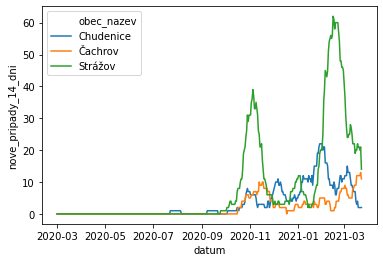

In [48]:
sns.lineplot(data=df[df.obec_nazev.isin(obce)],hue="obec_nazev", x='datum', y="nove_pripady_14_dni")
# sns.lineplot(data=df[df.obec_nazev == "Chudenice"], x='datum', y="nove_pripady_14_dni")

In [36]:
# sns.ecdfplot(data=df[df.obec_nazev.isin(["Strážov", "Chudenice", "Čachrov"])],hue="obec_nazev", x='datum', y="nove_pripady_14_dni")

In [33]:
sns.__version__

'0.10.0'

# Celkový počet nakažených za 2021

In [49]:
dfsel = df[df.obec_nazev.isin(obce)][df.datum < pd.to_datetime("2021-01-01")]

C:\Users\Jirik\Miniconda3\envs\lisa3qt5\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [50]:

pd.pivot_table(data=dfsel, index="obec_nazev",values=["nove_pripady"], aggfunc=np.sum)

,nove_pripady
obec_nazev,
Chudenice,33
Strážov,84
Čachrov,25
